# Neural Network (Desktop version)
With this Jupyter notebook i will execute several operation to have a funtional Neural Network.

This Notebook has been prepared to be used in Google Colab.

# Google Drive access

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!ls "/content/drive/My Drive/TFM/data"

commonURL = "/content/drive/My Drive/TFM/"

train  validation


# The Neural Network Architecture

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2

# Data pre-processing
# dimensions of our images.
img_width, img_height = 240, 135
num_classes = 6

train_data_dir = commonURL + 'data/train'
validation_data_dir = commonURL + 'data/validation'


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras import backend as K
from keras.applications import vgg16
from keras.optimizers import Adam
from keras.layers import Input

input_tensor = Input(shape=(img_width, img_height,3))

"""
vgg16_model = vgg16.VGG16(include_top=False, input_tensor=input_tensor)
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)
for layer in model.layers:
  layer.trainable = False
  
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
"""


model = Sequential()
model.add(Conv2D(64, (10,10), padding='same', kernel_regularizer=regularizers.l2(0.0001), input_shape = (img_width, img_height,3)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(64, (20,20), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (20,20), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(64, (10,10), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (10,10), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(128, (5,5), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (10,10), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(64, (5,5), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
  
"""
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(64, (2,2), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
"""

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 240, 135, 64)      19264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 240, 135, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 240, 135, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 240, 135, 64)      1638464   
_________________________________________________________________
batch_normalization_2 (Batch (None, 240, 135, 64)      256       
_________________________________________________________________
activation_2 (Activation)    (None, 240, 135, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 67, 64)       0         
__________

'\nmodel.add(Conv2D(64, (3,3), padding=\'same\', kernel_regularizer=regularizers.l2(0.0001)))\nmodel.add(BatchNormalization())\nmodel.add(Activation("elu"))\nmodel.add(Conv2D(64, (2,2), padding=\'same\', kernel_regularizer=regularizers.l2(0.0001)))\nmodel.add(BatchNormalization())\nmodel.add(Activation("elu"))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.4))\nmodel.add(Flatten())\nmodel.add(Dense(6, activation=\'softmax\'))\nmodel.summary()\nmodel.compile(Adam(lr=.0001), loss=\'categorical_crossentropy\', metrics=[\'accuracy\'])\n'

# Training

In [0]:
nb_train_samples = 25000
nb_validation_samples = 10000
epochs = 10
batch_size = 64

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator( rotation_range = 180)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Training
import time
start = time.time()
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)
end = time.time()

Found 7226 images belonging to 6 classes.
Found 1941 images belonging to 6 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
390/390 [==============================] - 5741s 15s/step - loss: 0.4427 - acc: 0.8699 - val_loss: 11.2063 - val_acc: 0.2735
Epoch 2/10
390/390 [==============================] - 3482s 9s/step - loss: 0.1886 - acc: 0.9651 - val_loss: 5.7791 - val_acc: 0.6190
Epoch 3/10
390/390 [==============================] - 3471s 9s/step - loss: 0.1703 - acc: 0.9760 - val_loss: 6.6784 - val_acc: 0.5083
Epoch 4/10
390/390 [==============================] - 3472s 9s/step - loss: 0.1634 - acc: 0.9774 - val_loss: 5.8888 - val_acc: 0.5243
Epoch 5/10
390/390 [==============================] - 3471s 9s/step - loss: 0.1566 - acc: 0.9789 - val_loss: 6.2491 - val_acc: 0.5064
Epoch 6/10
390/390 [==============================] - 3472s 9s/step - loss: 0.1414 - acc: 0.9832 - val_loss: 10.3598 - val_acc: 0.3488
Epoch 7/10
390/390 [==============================] - 3464s 9

Loss:  9.76963717583709 Accuracy:  0.36784297782959197


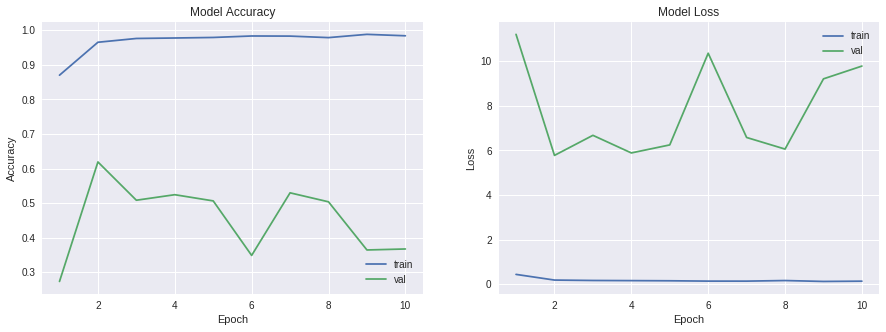

Training MLP took 36974.61120891571 seconds


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
#del model

#from keras.models import load_model

#print("Loading Neural Network...")
#model = load_model(commonURL + 'my_first_neural_network.h5')
#print("Neural Network loaded")
    
score = model.evaluate_generator(validation_generator, nb_validation_samples/batch_size, workers=1)

print("Loss: ", score[0], "Accuracy: ", score[1])

plot_model_history(history)

print("Training MLP took " + str(end - start) + " seconds")

model.save(commonURL + 'my_first_neural_network.h5')

# Tests

In [0]:
del model

In [0]:
from keras.models import load_model
model = load_model(commonURL + 'my_first_neural_network.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


Image: /content/drive/My Drive/TFM/data/validation/Nodo1/img1000.jpg
	Real label: 	Node0 - 0.1682185335084796%
	Prediction: 	Node2 - 84.58693623542786%
Num. true positives: 0
Total Images: 1
true/total: 0.0
Image: /content/drive/My Drive/TFM/data/validation/Nodo1/img1009.jpg
	Real label: 	Node0 - 0.06937106372788548%
	Prediction: 	Node2 - 75.70332884788513%
Num. true positives: 0
Total Images: 2
true/total: 0.0
Image: /content/drive/My Drive/TFM/data/validation/Nodo1/img101.jpg
	Real label: 	Node0 - 0.8240701630711555%
	Prediction: 	Node2 - 80.83675503730774%
Num. true positives: 0
Total Images: 3
true/total: 0.0
Image: /content/drive/My Drive/TFM/data/validation/Nodo1/img1053.jpg
	Real label: 	Node0 - 0.06334371282719076%
	Prediction: 	Node2 - 95.89213132858276%
Num. true positives: 0
Total Images: 4
true/total: 0.0
Image: /content/drive/My Drive/TFM/data/validation/Nodo1/img1064.jpg
	Real label: 	Node0 - 0.04868113901466131%
	Prediction: 	Node2 - 92.13069677352905%
Num. true positive

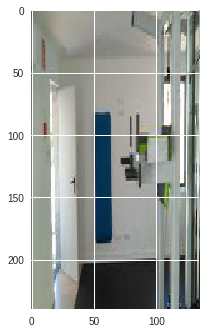

In [0]:
def lookForBest(prediction):
  best = 0
  categories = 6
  for i,probability in enumerate(prediction[0]):
    if probability > prediction[0][best]:
      best = i
  return best

def predictImg(img,realLabel,model):
  prediction = model.predict(img)
  print("\tReal label: \tNode" + str(realLabel) + " - " + str(prediction[0][realLabel]*100) + "%")
  best = lookForBest(prediction);
  print("\tPrediction: \tNode" + str(best) + " - " + str(prediction[0][best]*100) + "%")
  if(realLabel == best):
    return True
  return False

import glob
import os,shutil
from keras.preprocessing import image

totalImages = 0
numTruePositives = 0
label = -1
for directory in glob.glob("/content/drive/My Drive/TFM/data/validation/*"):
  label = label + 1
  for imgUrl in glob.glob(directory + "/*"):
    print("Image: " + str(imgUrl))
    img = image.load_img(imgUrl, target_size=(img_width, img_height))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    if(predictImg(img,label,model)):
      numTruePositives = numTruePositives + 1
    totalImages = totalImages + 1
    print("Num. true positives: " + str(numTruePositives))
    print("Total Images: " + str(totalImages))
    print("true/total: " + str(numTruePositives/totalImages))

In [0]:
#from sklearn.metrics import confusion_matrix

predictions = model.predict_generator(validation_generator, nb_validation_samples/batch_size)

def lookForCategory(predictions):
  best = 0
  category = 6
  i=0
  for prediction in predictions:
    if best <= prediction:
      category = i
      best = prediction
    i += 1
  return category, best

correct = 0
for i, real in enumerate(validation_generator.filenames):
  realNode = real.split('/')[0].split('Nodo')[1]
  realNode = int(realNode)-1
  nodePrediction, probability = lookForCategory(predictions[i])
  print("Image: " + str(real))
  print("\tReal label: \t" + real.split('/')[0] + " - " + str(predictions[i][realNode]*100) + "%")
  print("\tPrediction: \tNode" + str(nodePrediction+1) + " - " + str(probability*100) + "%")
  if predictions[i][realNode] >= 0.5:
    correct += 1
print("\nCorrect: " + str(correct))
print("\nAccuracy: " + str(correct/nb_validation_samples))

Found 20464 images belonging to 6 classes.
Found 1941 images belonging to 6 classes.
Image: Nodo1/img1000.jpg
	Real label: 	Nodo1 - 0.08452297188341618%
	Prediction: 	Node3 - 88.27464580535889%
Image: Nodo1/img1009.jpg
	Real label: 	Nodo1 - 0.005370429789763875%
	Prediction: 	Node3 - 99.06959533691406%
Image: Nodo1/img101.jpg
	Real label: 	Nodo1 - 0.012218736810609698%
	Prediction: 	Node5 - 81.49159550666809%
Image: Nodo1/img1017.jpg
	Real label: 	Nodo1 - 0.19559324719011784%
	Prediction: 	Node3 - 71.07775211334229%
Image: Nodo1/img1022.jpg
	Real label: 	Nodo1 - 5.422547087073326%
	Prediction: 	Node3 - 89.93006348609924%
Image: Nodo1/img1025.jpg
	Real label: 	Nodo1 - 0.0685010221786797%
	Prediction: 	Node3 - 62.94243931770325%
Image: Nodo1/img1049.jpg
	Real label: 	Nodo1 - 0.03462028689682484%
	Prediction: 	Node5 - 52.2957980632782%
Image: Nodo1/img1053.jpg
	Real label: 	Nodo1 - 0.03624074161052704%
	Prediction: 	Node3 - 97.40358591079712%
Image: Nodo1/img1056.jpg
	Real label: 	Nodo1 -